<a href="https://colab.research.google.com/github/MahimnaDarji/Cricket-Analysis/blob/main/IPL%20Team%20Runs%20Comparison%20Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv('/content/drive/MyDrive/DATASETS/deliveries_updated_mens_ipl.csv')

In [51]:
df.head(10)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1082591,1,0.6,0,6,Sunrisers Hyderabad,Royal Challengers Bangalore,S Dhawan,DA Warner,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1082591,1,0.7,0,7,Sunrisers Hyderabad,Royal Challengers Bangalore,S Dhawan,DA Warner,TS Mills,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN
7,1082591,1,1.1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,S Dhawan,DA Warner,A Choudhary,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1082591,1,1.2,1,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,A Choudhary,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1082591,1,1.3,1,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,A Choudhary,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [52]:
df['total_runs']=df.apply(lambda x: x['batsman_runs'] + x['extras'],axis=1)

In [53]:
df.matchId.unique()

array([1082591, 1082592, 1082593, 1082594, 1082595, 1082596, 1082597,
       1082598, 1082599, 1082600, 1082601, 1082602, 1082603, 1082604,
       1082605, 1082606, 1082607, 1082608, 1082609, 1082610, 1082611,
       1082612, 1082613, 1082614, 1082615, 1082616, 1082617, 1082618,
       1082620, 1082621, 1082622, 1082623, 1082624, 1082625, 1082626,
       1082627, 1082628, 1082629, 1082630, 1082631, 1082632, 1082633,
       1082634, 1082635, 1082636, 1082637, 1082638, 1082639, 1082640,
       1082641, 1082642, 1082643, 1082644, 1082645, 1082646, 1082647,
       1082648, 1082649, 1082650, 1136561, 1136562, 1136563, 1136564,
       1136565, 1136566, 1136567, 1136568, 1136569, 1136570, 1136571,
       1136572, 1136573, 1136574, 1136575, 1136576, 1136577, 1136578,
       1136579, 1136580, 1136581, 1136582, 1136583, 1136584, 1136585,
       1136586, 1136587, 1136588, 1136589, 1136590, 1136591, 1136592,
       1136593, 1136594, 1136595, 1136596, 1136597, 1136598, 1136599,
       1136600, 1136

In [48]:
def showbymatch(df,matchId):

  df=df[df.matchId==matchId]

  df1=df[df.inning == 1]
  df2=df[df.inning == 2]

  df1.reset_index(inplace=True,drop=True)
  df2.reset_index(inplace=True,drop=True)

  df1['cum_runs']=0

  runs_count=0
  for i in range(len(df1)):
    runs_count += df1['total_runs'][i]
    df1['cum_runs'][i]=runs_count

  df2['cum_runs']=0

  runs_count=0
  for i in range(len(df2)):
    runs_count += df2['total_runs'][i]
    df2['cum_runs'][i]=runs_count

  ball_ing1=[i for i in range(1,len(df1)+1)]
  ball_ing2=[i for i in range(1,len(df2)+1)]

  wkt_index1=list(df1[~df1.player_dismissed.isna()].index)
  wkt_index2=list(df2[~df2.player_dismissed.isna()].index)

  run_index1=list(df1[df1.index.isin(wkt_index1)].cum_runs)
  run_index2=list(df2[df2.index.isin(wkt_index2)].cum_runs)

  team1=df1.batting_team[0]
  team2=df2.batting_team[0]

  plt.figure(figsize=(12,4))

  plt.plot(ball_ing1,df1.cum_runs,linewidth=3,label=team1)
  plt.plot(ball_ing2,df2.cum_runs,linewidth=3,label=team2)

  plt.scatter(wkt_index1,run_index1,s=100)
  plt.scatter(wkt_index2,run_index2,s=100)

  plt.axvline(x=36,ls='--',color='g')
  plt.axvline(x=90,ls='--',color='g')

  plt.text(16,1.01,'Powerplay')
  plt.text(65,1.01,'Middle Overs')
  plt.text(105,1.01,'Death Overs')

  plt.xlabel('Number Of Balls')
  plt.ylabel('Number Of Runs')
  plt.legend()

  plt.show()

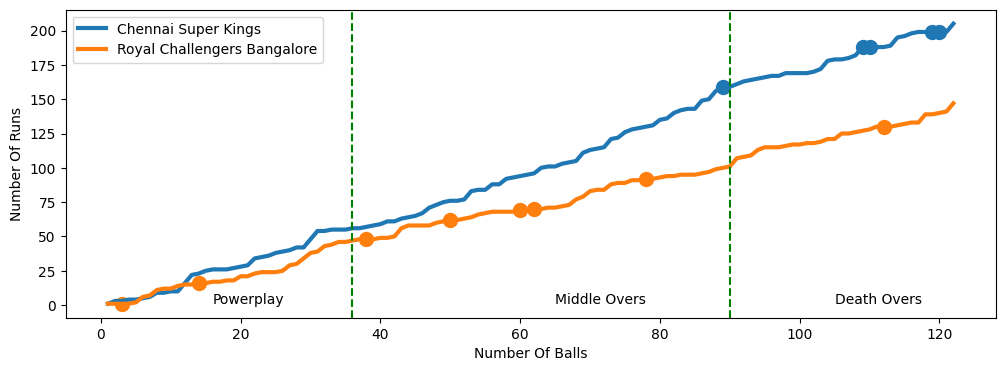

In [54]:
showbymatch(df,501271)